# Credit Card Default Predictor (DSCI Group Project Proposal)

## Introduction
This project is to come up with a classification predictive model of whether the an account will default on his/her next credit card payment (not pay the balance). The dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) and hosted on [our project github](https://raw.githubusercontent.com/mlool/dsci-100-2023W1-group-008-31/main/data/UCI_Credit_Card.csv).

From the dataset, we see the each observation constitude one client, with basic info such as sex, education, etc. A list of repayment status for each month (PAY_n), bill amount from the same months (BILL_AMTn), and amount of previous payments (PAY_AMTn). Where n corresponds to month before Sept 2005.

## Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
data_url <- url("https://raw.githubusercontent.com/mlool/dsci-100-2023W1-group-008-31/main/data/UCI_Credit_Card.csv")
credit_card_data <- read_csv(data_url)
credit_card_data

Rows: 30000 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


**Observations:** We notice that PAY skiped PAY_1 and added a PAY_0, should to keep things consistent, I will rename the column. Furthermore, we observe some columns should be of type category (fct) based on the dataset website, so I will mutate those columns as well.

In [3]:
category_colnames <- c("SEX", "EDUCATION", "MARRIAGE", "default.payment.next.month")
credit_card_tidy <- credit_card_data |>
                        rename(PAY_1 = PAY_0) |>
                        mutate(across(category_colnames, ~as_factor(.x)))
credit_card_tidy

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(category_colnames, ~as_factor(.x))`.
Caused by warning:
! Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(category_colnames)

  # Now:
  data %>% select(all_of(category_colnames))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


Now what our dataset is tidier, we can split them 

In [4]:
credit_card_split <- initial_split(credit_card_tidy, prop = 0.75, strata = default.payment.next.month)
credit_card_training <- training(credit_card_split)
credit_card_testing <- testing(credit_card_split)
credit_card_training

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29995,80000,1,2,2,34,2,2,2,2,⋯,77519,82607,81158,7000,3500,0,7000,0,4000,1
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Number of observation in each class
training_count <- credit_card_training |>
                    group_by(default.payment.next.month) |>
                    summarize(count = n())
training_count

default.payment.next.month,count
<fct>,<int>
0,17523
1,4977


We notice there's more none defaults than defaults, leading me to think perhaps we should measure our model based on precision/recall instead of accuracy alone.

In [6]:
training_sex_count <- credit_card_training |>
                        group_by(SEX, default.payment.next.month) |>
                        summarize(count = n()) |>
                        group_by(SEX) |>
                        summarize(percent_of_default = sum(count[default.payment.next.month == 1]) / sum(count)) |>
                        mutate(SEX = case_when(SEX == 1 ~ "male", SEX == 2 ~ "female"))

training_sex_count

`summarise()` has grouped output by 'SEX'. You can override using the `.groups`
argument.


SEX,percent_of_default
<chr>,<dbl>
male,0.2422744
female,0.2074112


In [7]:
training_marriage_count <- credit_card_training |>
                            group_by(MARRIAGE, default.payment.next.month) |>
                            summarize(count = n()) |>
                            group_by(MARRIAGE) |>
                            summarize(percent_of_default = sum(count[default.payment.next.month == 1]) / sum(count)) |>
                            mutate(MARRIAGE = case_when(MARRIAGE == 1 ~ "married", 
                                                        MARRIAGE == 2 ~ "single",
                                                        MARRIAGE == 3 ~ "other"
                                                       ))

training_marriage_count

`summarise()` has grouped output by 'MARRIAGE'. You can override using the
`.groups` argument.


MARRIAGE,percent_of_default
<chr>,<dbl>
NA,0.1162791
married,0.2325308
single,0.2111703
other,0.2622222


In [10]:
training_education_count <- credit_card_training |>
                            group_by(EDUCATION, default.payment.next.month) |>
                            summarize(count = n()) |>
                            group_by(EDUCATION) |>
                            summarize(percent_of_default = sum(count[default.payment.next.month == 1]) / sum(count)) |>
                            mutate(EDUCATION = case_when(EDUCATION == 1 ~ "grad", 
                                                        EDUCATION == 2 ~ "university",
                                                        EDUCATION == 3 ~ "high school",
                                                        TRUE ~ "others"
                                                       ))

print(training_education_count)

`summarise()` has grouped output by 'EDUCATION'. You can override using the
`.groups` argument.


# A tibble: 7 × 2
  EDUCATION   percent_of_default
  <chr>                    <dbl>
1 others                  0     
2 grad                    0.195 
3 university              0.237 
4 high school             0.247 
5 others                  0.0588
6 others                  0.0577
7 others                  0.171 


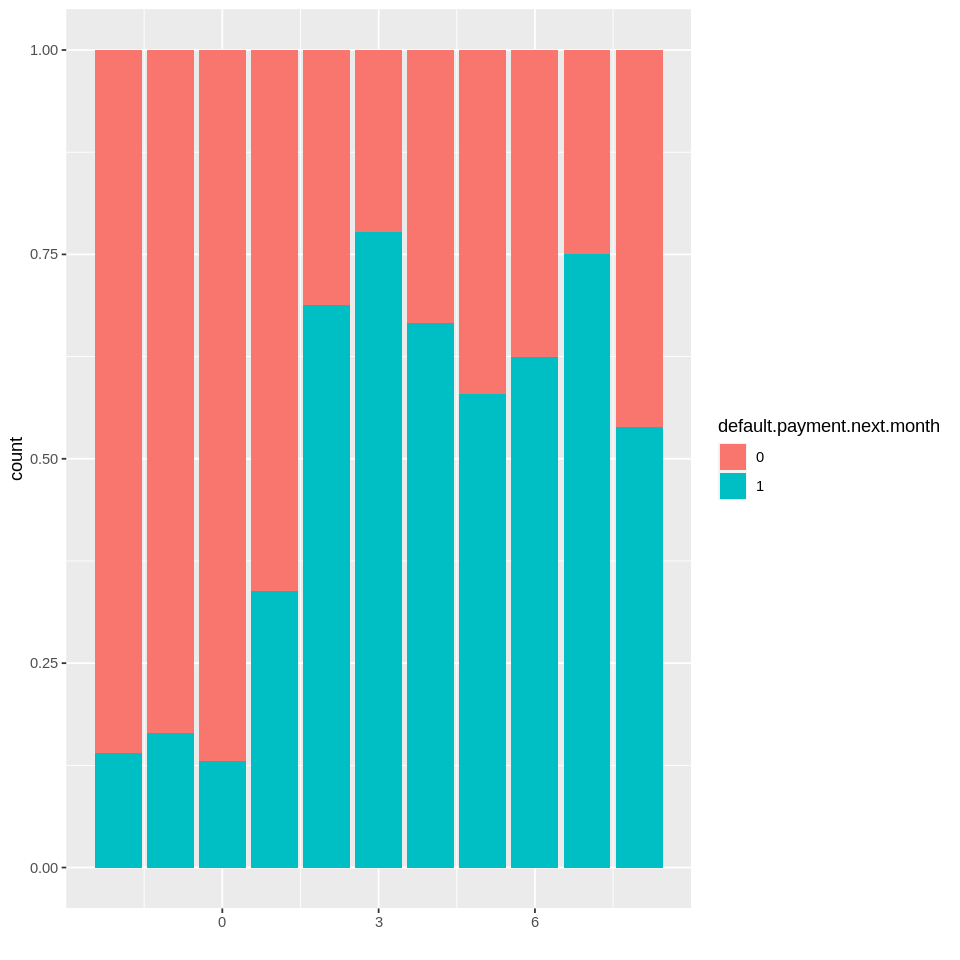

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8)

pay_1_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_1, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "")
pay_1_plot